# Customer market segmentation (K-Means,PCA,Autoencoders)

### 1 -Import the modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 2 -Import the dataset and exploration

In [7]:
creditcard_df=pd.read_csv("Marketing_data.csv")
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 3 - Check for na values and clean the dataset

In [10]:
creditcard_df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
creditcard_df["MINIMUM_PAYMENTS"]=creditcard_df["MINIMUM_PAYMENTS"].fillna(creditcard_df["MINIMUM_PAYMENTS"].mean())

In [12]:
creditcard_df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
creditcard_df["CREDIT_LIMIT"]=creditcard_df["CREDIT_LIMIT"].fillna(creditcard_df["MINIMUM_PAYMENTS"].mean())

In [14]:
creditcard_df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
creditcard_df.duplicated().sum()

0

In [16]:
creditcard_df.drop("CUST_ID",axis=1,inplace=True)

In [17]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [18]:
n=len(creditcard_df.columns)
n

17

In [19]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### 4- Plot the correlations in the dataset

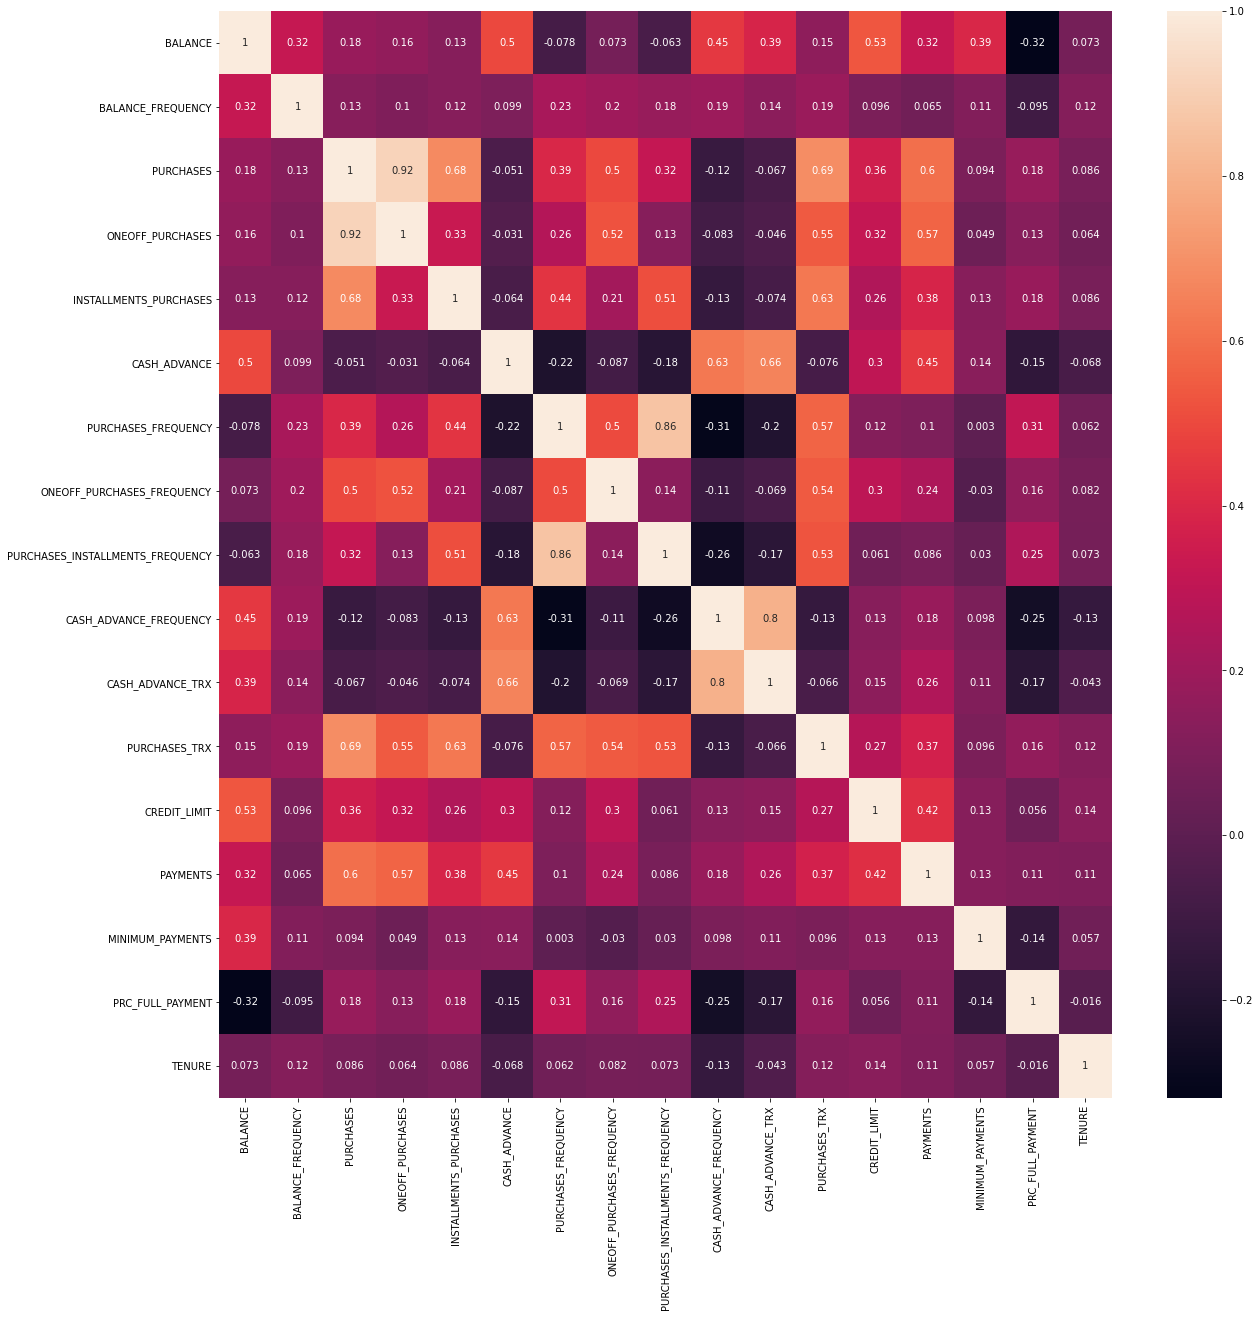

In [20]:
f,ax = plt.subplots(figsize=(20,20))
correlations = creditcard_df.corr()
sns.heatmap(correlations,annot=True)

### 5 -Scale the dataset

In [21]:
scaler=StandardScaler()
creditcard_df_scaled=scaler.fit_transform(creditcard_df)

In [22]:
creditcard_df_scaled.shape

(8950, 17)

### 6- Looking for the right K for kmean algorythm

In [23]:
scores_1 =[]
range_values = range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)

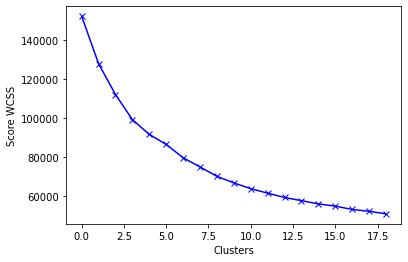

In [24]:
plt.plot(scores_1,"bx-")
plt.xlabel("Clusters")
plt.ylabel("Score WCSS")
plt.show()

In [25]:
kmeans=KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels=kmeans.labels_

In [26]:
labels

array([0, 2, 1, ..., 7, 7, 7])

### 6- Cluster centers

In [27]:
kmeans.cluster_centers_.shape

(8, 17)

In [28]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_df.columns])

In [29]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.017968,0.403365,-0.360563,-0.245696,-0.401046,-0.091567,-0.865087,-0.407613,-0.758168,0.108612,-0.025045,-0.485769,-0.303998,-0.250283,-0.004017,-0.456705,0.272801
1,-0.172518,0.391697,0.483239,0.631443,-0.017605,-0.339901,0.949803,1.904282,0.083572,-0.422502,-0.335887,0.539765,0.384466,0.104835,-0.166106,0.438493,0.264172
2,1.681419,0.391712,-0.217392,-0.155507,-0.228395,2.019730,-0.473633,-0.204731,-0.413706,1.924554,1.936383,-0.264350,1.027071,0.822318,0.508990,-0.391023,0.069513
3,0.944915,0.466926,2.250205,1.696298,2.204206,-0.190865,1.160488,1.529902,1.261450,-0.308191,-0.207009,2.792966,1.232843,1.279637,0.624816,0.266318,0.333671
4,-0.364027,0.334190,-0.037213,-0.240638,0.353918,-0.362755,0.988694,-0.376694,1.201084,-0.470333,-0.357628,0.188838,-0.258074,-0.215862,-0.055243,0.307526,0.256824
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044006,8.098975,1.120318,1.110132,0.310863
6,-0.701368,-2.145072,-0.312447,-0.237526,-0.302285,-0.321782,-0.556727,-0.445738,-0.439325,-0.520713,-0.376018,-0.419883,-0.177075,-0.203414,-0.256627,0.280785,0.199062
7,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.568620,-0.392680,-0.209145,0.014011,-3.203733


In [30]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.017968,0.403365,-0.360563,-0.245696,-0.401046,-0.091567,-0.865087,-0.407613,-0.758168,0.108612,-0.025045,-0.485769,-0.303998,-0.250283,-0.004017,-0.456705,0.272801
1,-0.172518,0.391697,0.483239,0.631443,-0.017605,-0.339901,0.949803,1.904282,0.083572,-0.422502,-0.335887,0.539765,0.384466,0.104835,-0.166106,0.438493,0.264172
2,1.681419,0.391712,-0.217392,-0.155507,-0.228395,2.019730,-0.473633,-0.204731,-0.413706,1.924554,1.936383,-0.264350,1.027071,0.822318,0.508990,-0.391023,0.069513
3,0.944915,0.466926,2.250205,1.696298,2.204206,-0.190865,1.160488,1.529902,1.261450,-0.308191,-0.207009,2.792966,1.232843,1.279637,0.624816,0.266318,0.333671
4,-0.364027,0.334190,-0.037213,-0.240638,0.353918,-0.362755,0.988694,-0.376694,1.201084,-0.470333,-0.357628,0.188838,-0.258074,-0.215862,-0.055243,0.307526,0.256824
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044006,8.098975,1.120318,1.110132,0.310863
6,-0.701368,-2.145072,-0.312447,-0.237526,-0.302285,-0.321782,-0.556727,-0.445738,-0.439325,-0.520713,-0.376018,-0.419883,-0.177075,-0.203414,-0.256627,0.280785,0.199062
7,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.568620,-0.392680,-0.209145,0.014011,-3.203733


In [31]:
labels.max()

7

In [32]:
print(kmeans.cluster_centers_)

[[ 1.79675964e-02  4.03365072e-01 -3.60562821e-01 -2.45695993e-01
  -4.01046424e-01 -9.15671214e-02 -8.65087296e-01 -4.07613356e-01
  -7.58168357e-01  1.08611953e-01 -2.50450813e-02 -4.85769141e-01
  -3.03997519e-01 -2.50283481e-01 -4.01746760e-03 -4.56704818e-01
   2.72801125e-01]
 [-1.72518227e-01  3.91697190e-01  4.83238500e-01  6.31442940e-01
  -1.76046075e-02 -3.39900807e-01  9.49802659e-01  1.90428157e+00
   8.35718861e-02 -4.22501747e-01 -3.35887395e-01  5.39765482e-01
   3.84466477e-01  1.04835476e-01 -1.66106330e-01  4.38493224e-01
   2.64172380e-01]
 [ 1.68141941e+00  3.91711756e-01 -2.17392093e-01 -1.55507314e-01
  -2.28394804e-01  2.01972983e+00 -4.73632831e-01 -2.04730791e-01
  -4.13705792e-01  1.92455436e+00  1.93638299e+00 -2.64349980e-01
   1.02707059e+00  8.22318163e-01  5.08990098e-01 -3.91023494e-01
   6.95131513e-02]
 [ 9.44914655e-01  4.66926199e-01  2.25020501e+00  1.69629797e+00
   2.20420595e+00 -1.90865456e-01  1.16048814e+00  1.52990241e+00
   1.26144983e+00 -

In [33]:
creditcard_df_cluster=pd.concat([creditcard_df,pd.DataFrame({"cluster":labels})], axis=1)
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,7
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,7
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,7
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,7


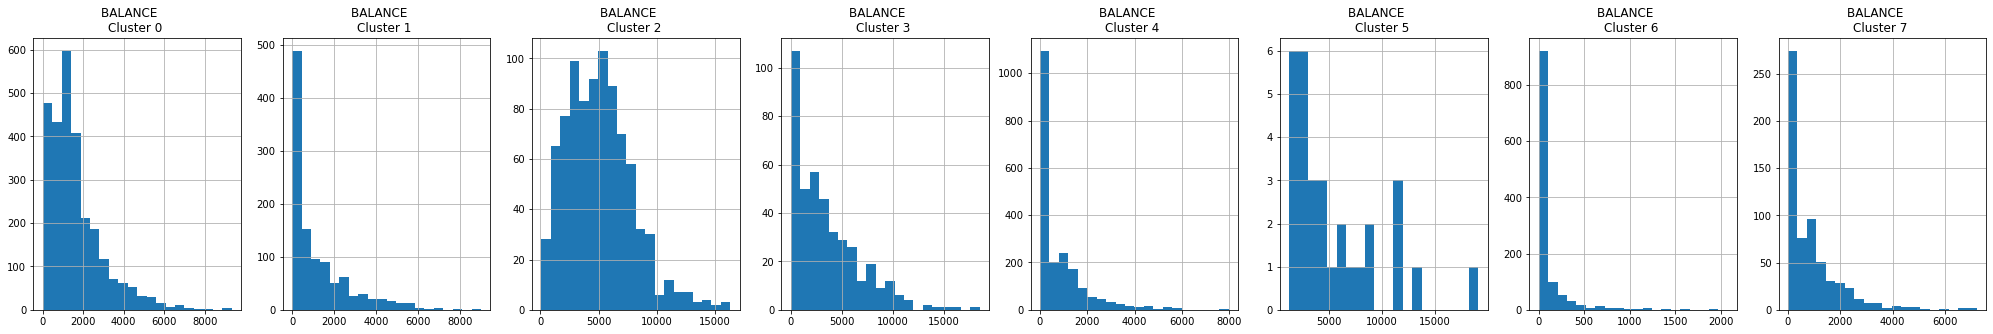

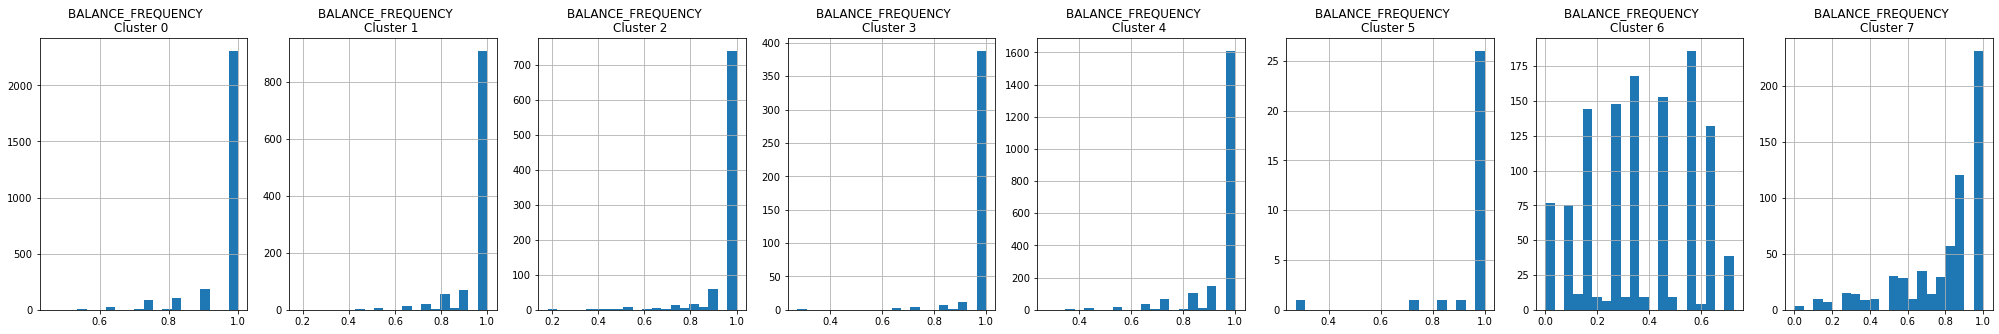

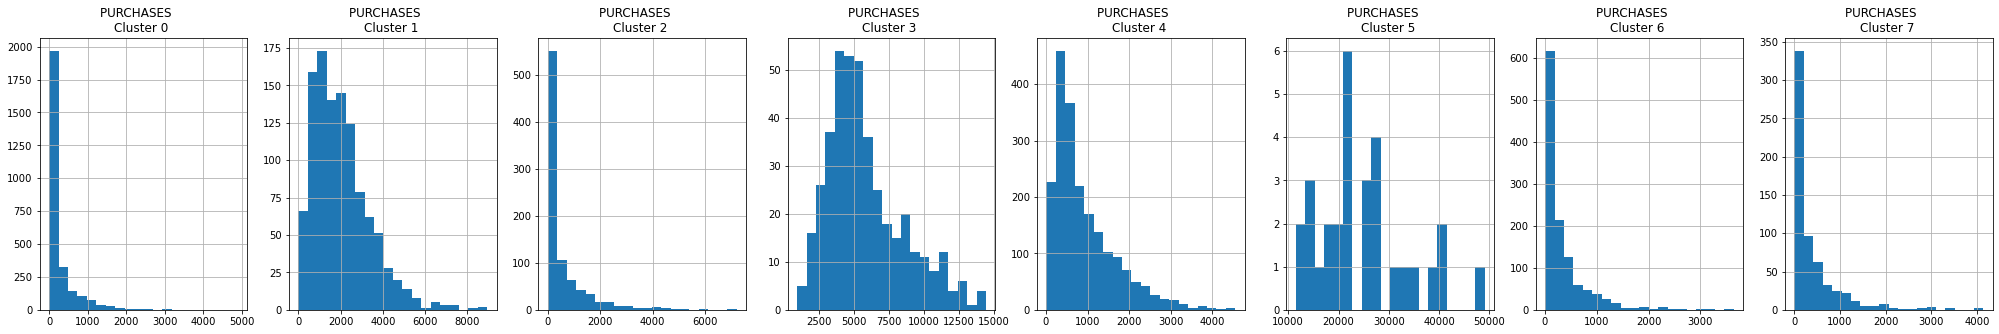

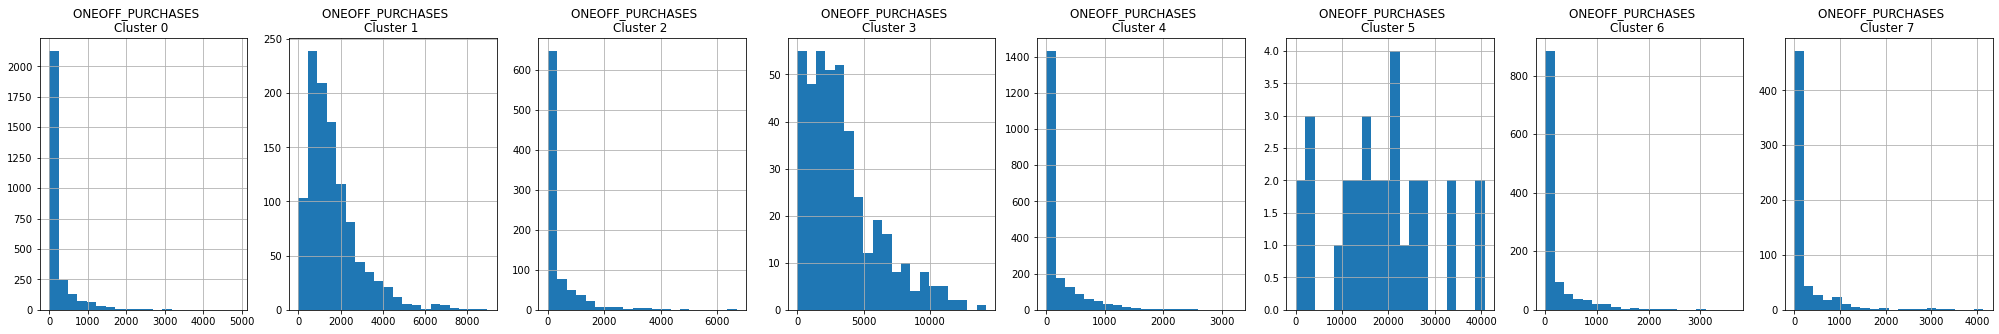

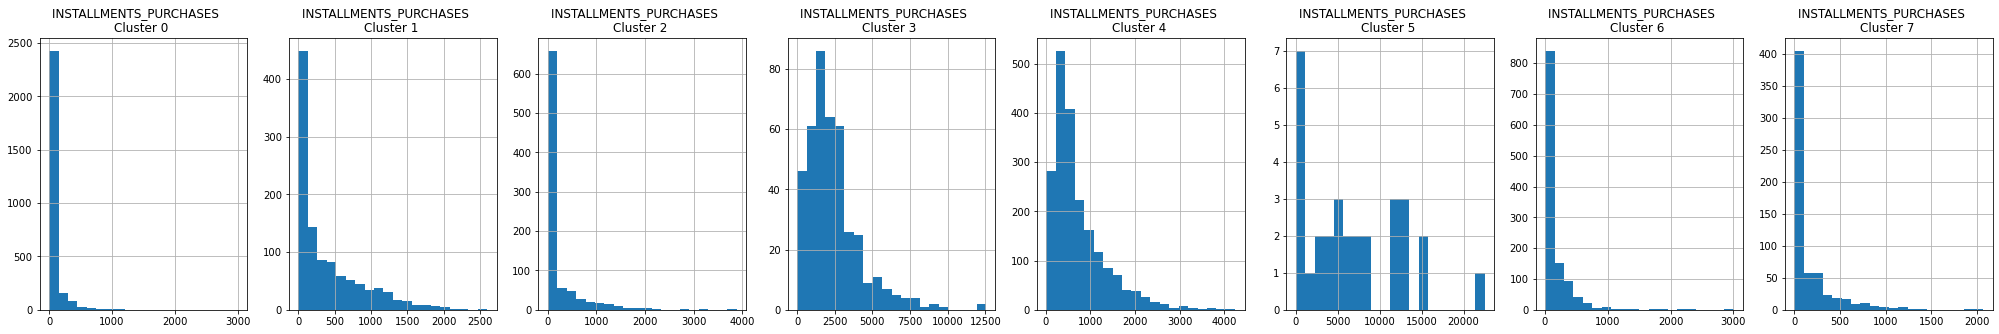

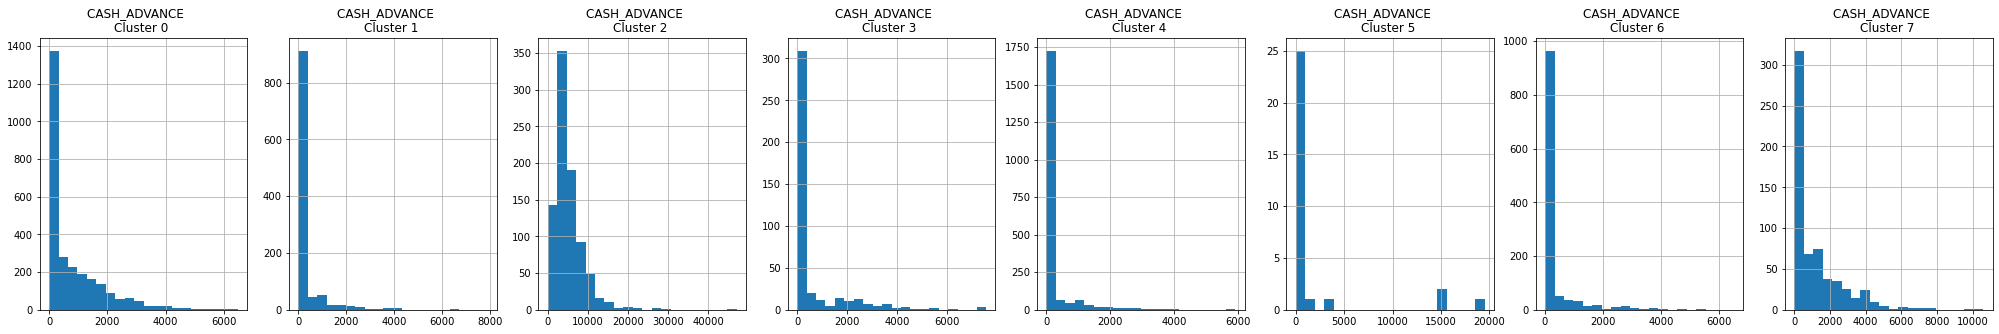

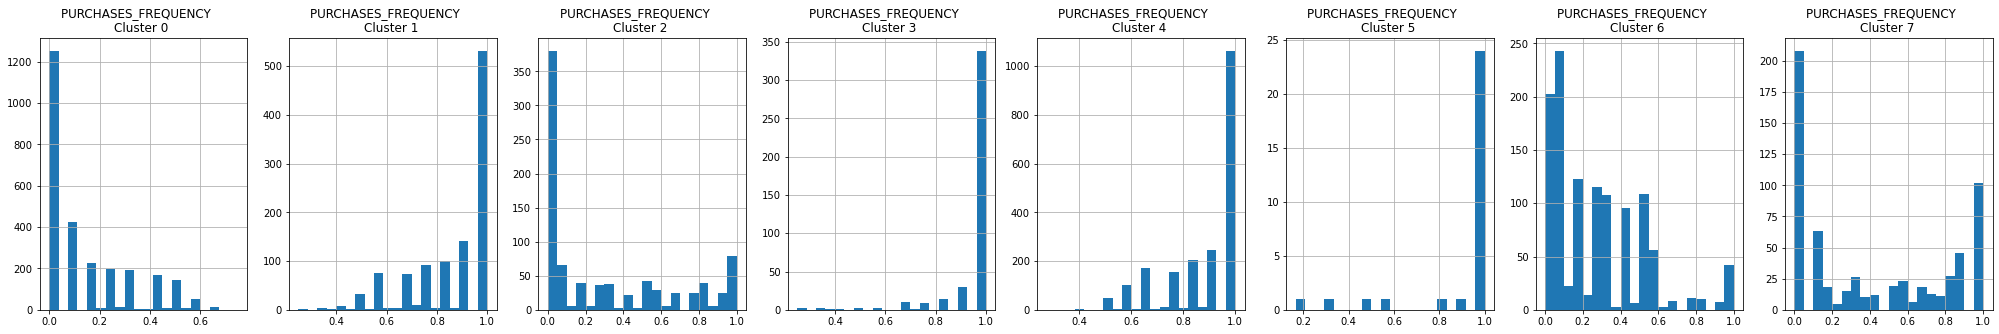

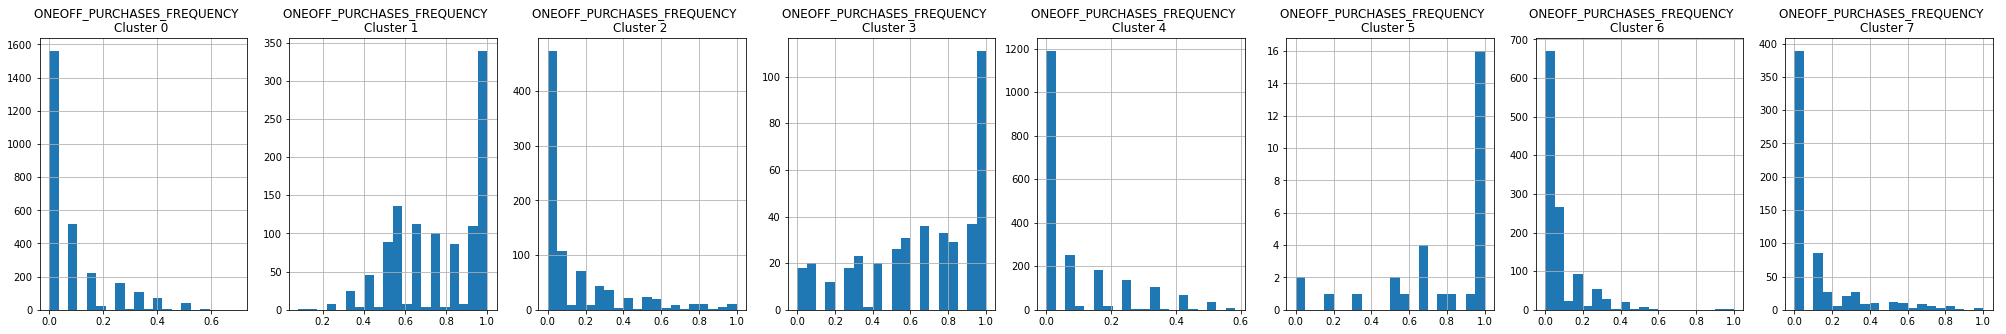

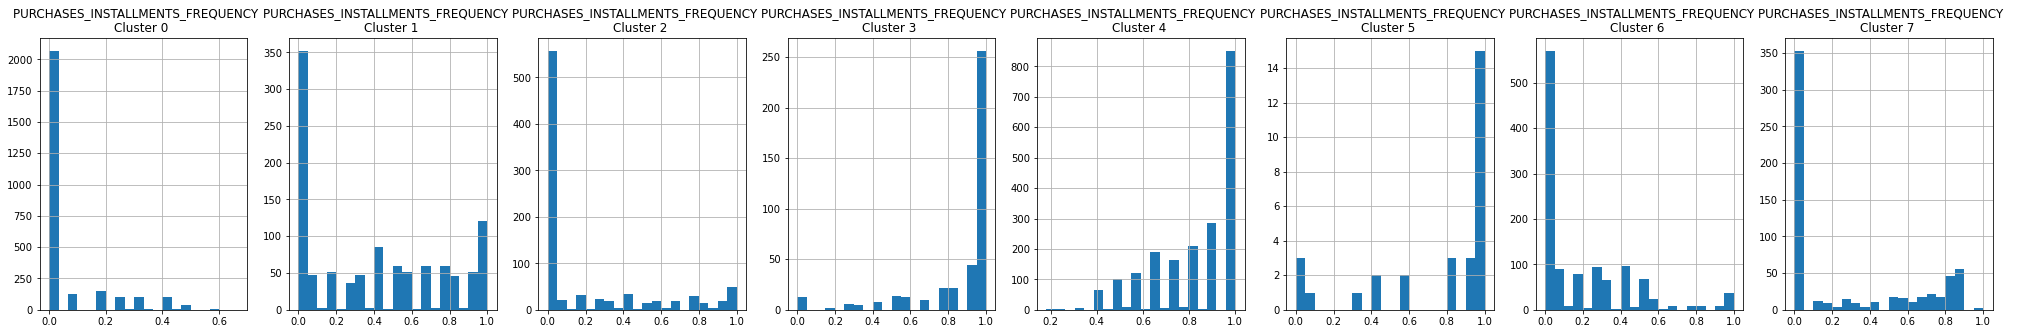

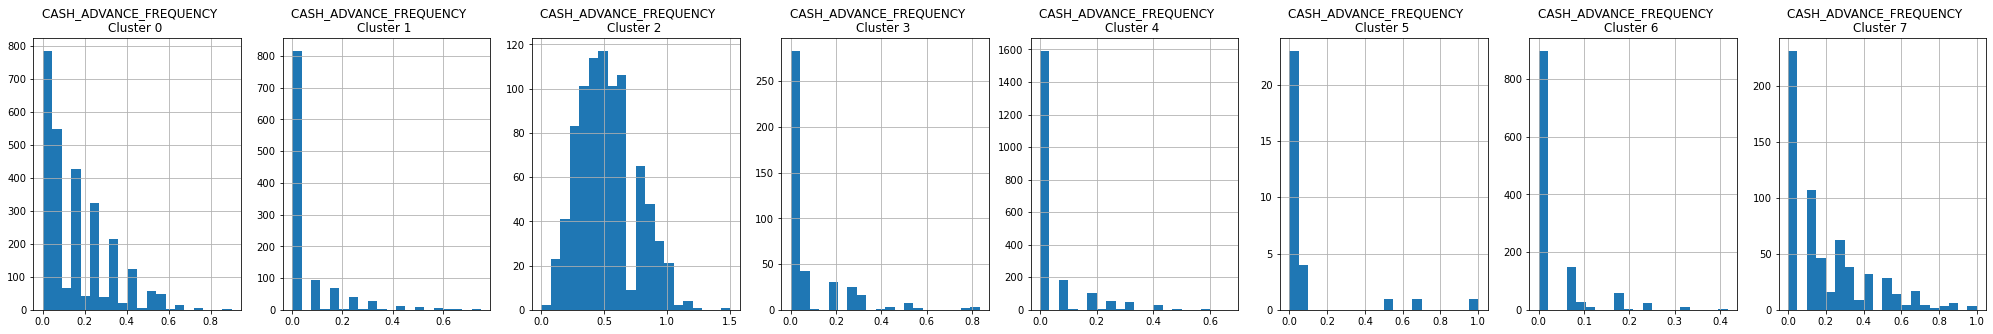

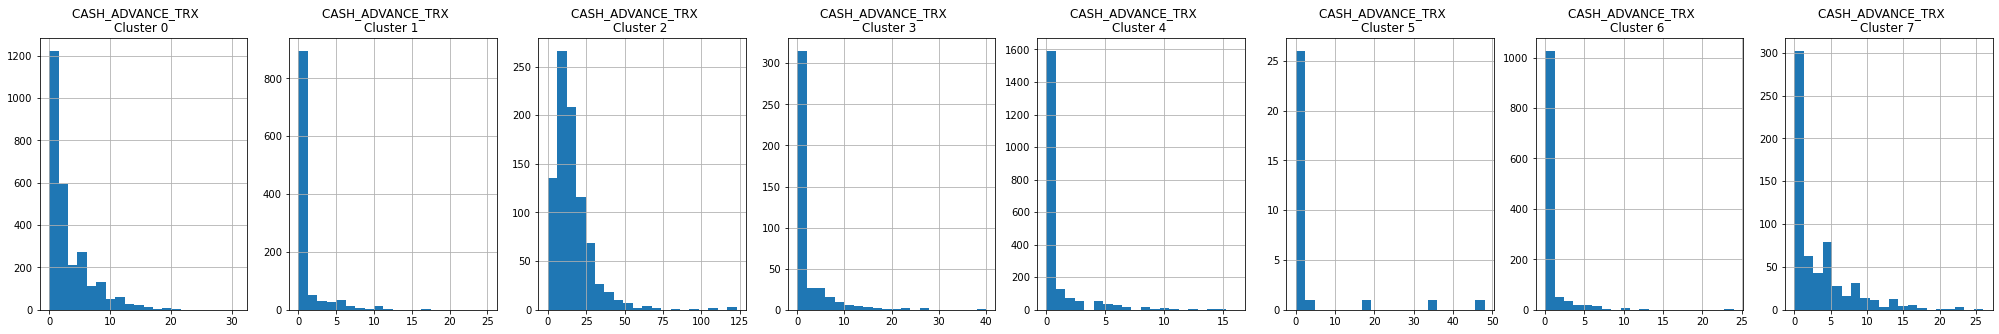

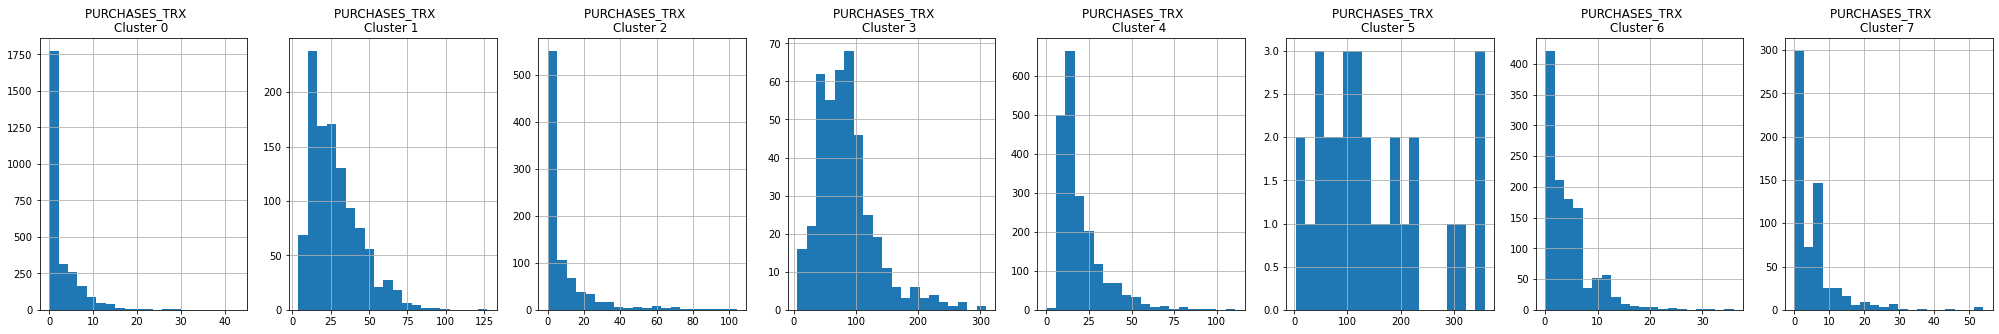

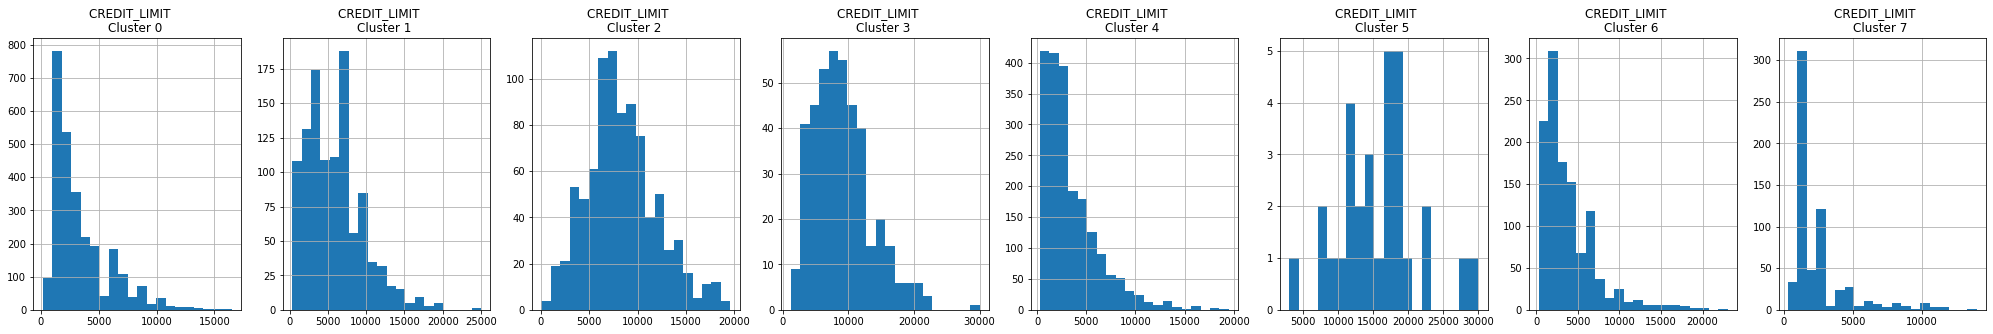

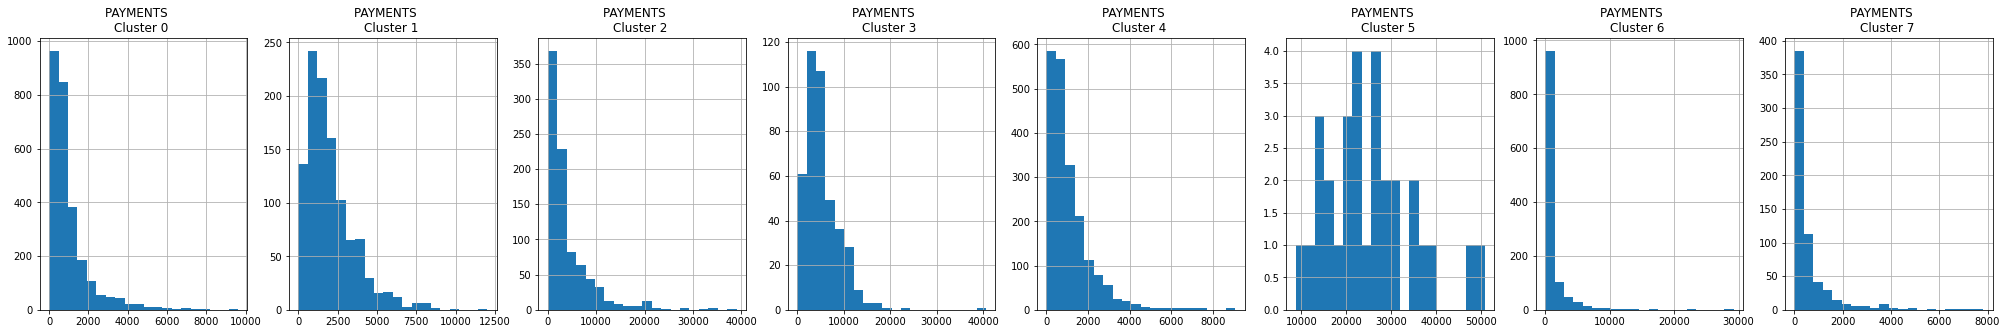

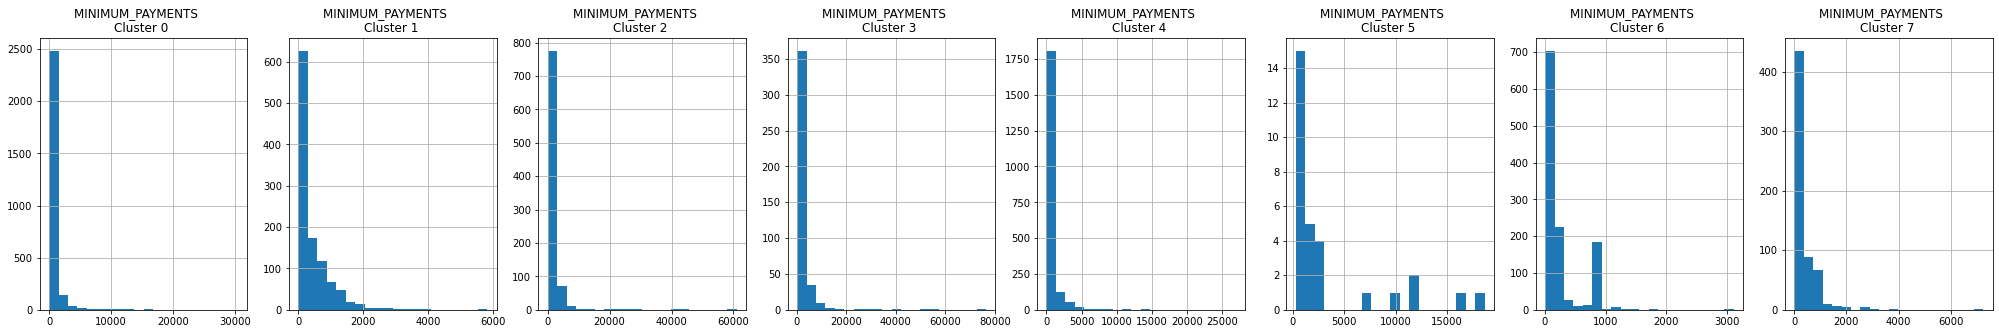

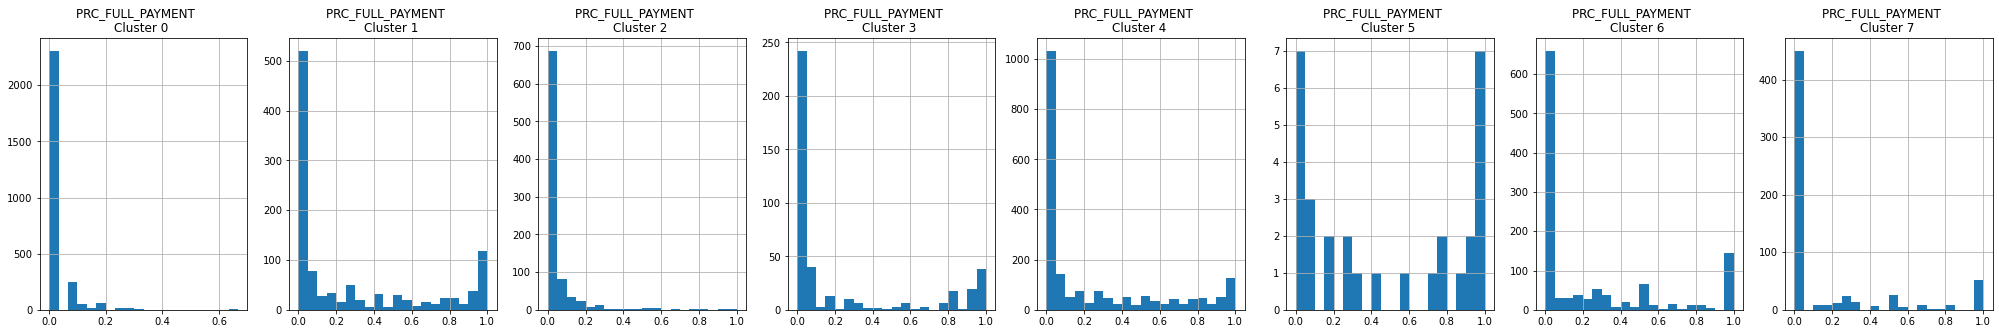

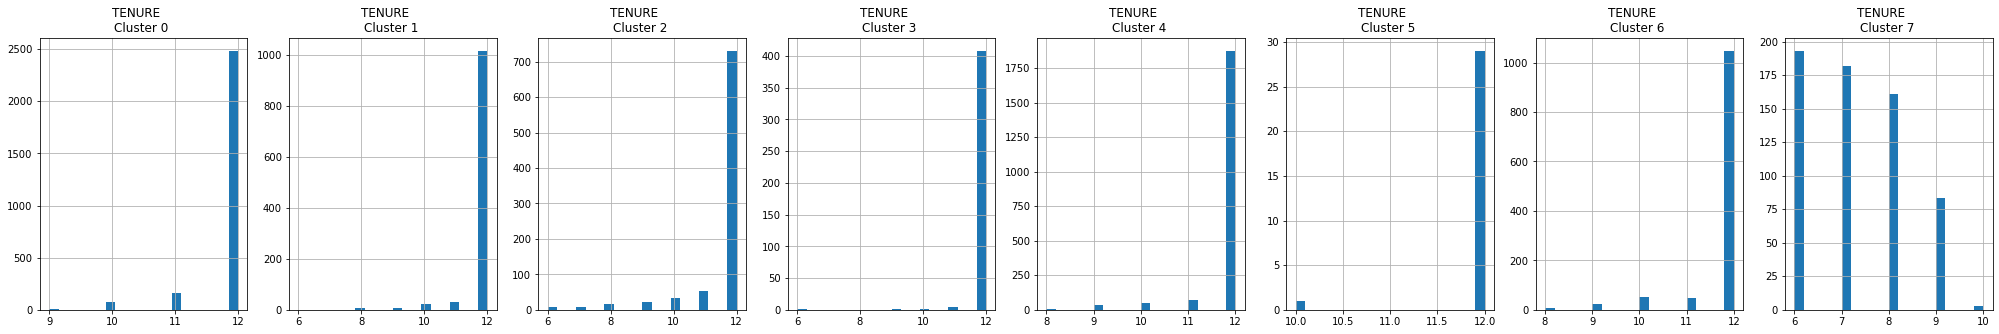

In [34]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

### 7-PCA

In [35]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68225965, -1.07631199],
       [-1.13810857,  2.50657548],
       [ 0.969736  , -0.38350229],
       ...,
       [-0.92639083, -1.8108607 ],
       [-2.33668784, -0.65799012],
       [-0.55657674, -0.40061446]])

In [36]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682260,-1.076312
1,-1.138109,2.506575
2,0.969736,-0.383502
3,-0.873565,0.043206
4,-1.599444,-0.688425


In [37]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682260,-1.076312,0
1,-1.138109,2.506575,2
2,0.969736,-0.383502,1
3,-0.873565,0.043206,0
4,-1.599444,-0.688425,0


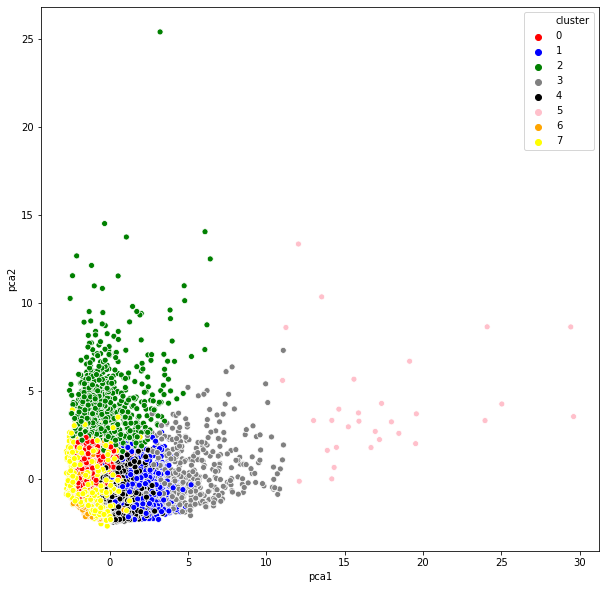

In [38]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=["red","blue","green","grey","black","pink","orange","yellow"])

### 8- Build and Auto-encoder

In [39]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [40]:
input_df=Input(shape=(17,))

In [46]:
x=Dense(7,activation="relu")(input_df)
x=Dense(500,activation="relu",kernel_initializer="glorot_uniform")(x)
x=Dense(500,activation="relu",kernel_initializer="glorot_uniform")(x)
x=Dense(2000,activation="relu",kernel_initializer="glorot_uniform")(x)

encoded=Dense(10,activation="relu",kernel_initializer="glorot_uniform")(x)

x=Dense(2000,activation="relu",kernel_initializer="glorot_uniform")(encoded)
x=Dense(500,activation="relu",kernel_initializer="glorot_uniform")(x)

decoded=Dense(17,activation="relu",kernel_initializer="glorot_uniform")(x)

autoencoder = Model(input_df,decoded)
encoder=Model(input_df,encoded)
autoencoder.compile(optimizer="adam",loss="mean_squared_error")

In [42]:
creditcard_df_scaled.shape

(8950, 17)

### 9- Train the auto-encoder

In [47]:
autoencoder.fit(creditcard_df_scaled,creditcard_df_scaled,batch_size=128,epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 2s 28ms/step - loss: 0.8868
Epoch 2/25
70/70 [==============================] - 2s 27ms/step - loss: 0.5789
Epoch 3/25
70/70 [==============================] - 2s 28ms/step - loss: 0.4981: 0s - l
Epoch 4/25
70/70 [==============================] - 2s 29ms/step - loss: 0.4740
Epoch 5/25
70/70 [==============================] - 2s 29ms/step - loss: 0.4516
Epoch 6/25
70/70 [==============================] - 2s 28ms/step - loss: 0.4308
Epoch 7/25
70/70 [==============================] - 2s 29ms/step - loss: 0.4340
Epoch 8/25
70/70 [==============================] - 2s 28ms/step - loss: 0.4039
Epoch 9/25
70/70 [==============================] - 2s 28ms/step - loss: 0.3916: 0s - 
Epoch 10/25
70/70 [==============================] - 3s 38ms/step - loss: 0.3873
Epoch 11/25
70/70 [==============================] - 3s 36ms/step - loss: 0.3917
Epoch 12/25
70/70 [==============================] - 2s 33ms/step - loss: 0.3864
Epoch 13/25
70/70 [===

In [49]:
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_24 (Dense)             (None, 7)                 126       
_________________________________________________________________
dense_25 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_26 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_27 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_28 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_29 (Dense)             (None, 2000)              2200

### 10-predict with the autoencoder

In [50]:
pred=encoder.predict(creditcard_df_scaled)
pred

array([[0.05220395, 0.25871614, 0.06384946, ..., 0.        , 0.23037818,
        0.        ],
       [0.32330185, 1.873556  , 0.20254365, ..., 0.        , 2.6919649 ,
        0.        ],
       [0.14777559, 0.13547397, 2.1957371 , ..., 0.        , 0.82058275,
        0.        ],
       ...,
       [0.7426529 , 0.37413025, 0.18243405, ..., 0.        , 0.        ,
        0.        ],
       [0.59710544, 0.4651052 , 0.28173682, ..., 0.        , 0.        ,
        0.        ],
       [0.1700902 , 1.3348367 , 1.624285  , ..., 0.        , 0.36706403,
        0.        ]], dtype=float32)

In [52]:
pred.shape

(8950, 10)

### 11-Kmeans with autoencoded datas

In [53]:
scores_1 =[]
range_values = range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_1.append(kmeans.inertia_)

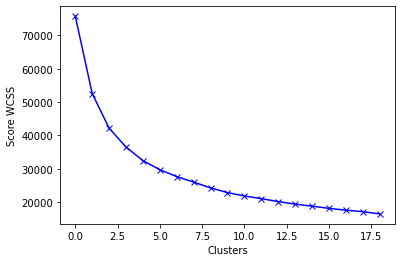

In [54]:
plt.plot(scores_1,"bx-")
plt.xlabel("Clusters")
plt.ylabel("Score WCSS")
plt.show()

In [55]:
kmeans=KMeans(5)
kmeans.fit(pred)
labels=kmeans.labels_

In [56]:
kmeans.cluster_centers_.shape

(5, 10)

In [58]:
df_cluster_dr=pd.concat([creditcard_df,pd.DataFrame({"cluster":labels})], axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


### 12-PCA with autoencoded datas

In [60]:
pca=PCA(n_components=2)
prin_comp=pca.fit_transform(pred)
pca_df=pd.DataFrame(data=prin_comp,columns=['pca1','pca2'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.359033,0.036450,0
1,1.520246,1.499278,1
2,-0.029271,-0.946622,2
3,-0.676617,-0.063666,0
4,-1.284562,0.038200,0


### 13 -Cluster visualization

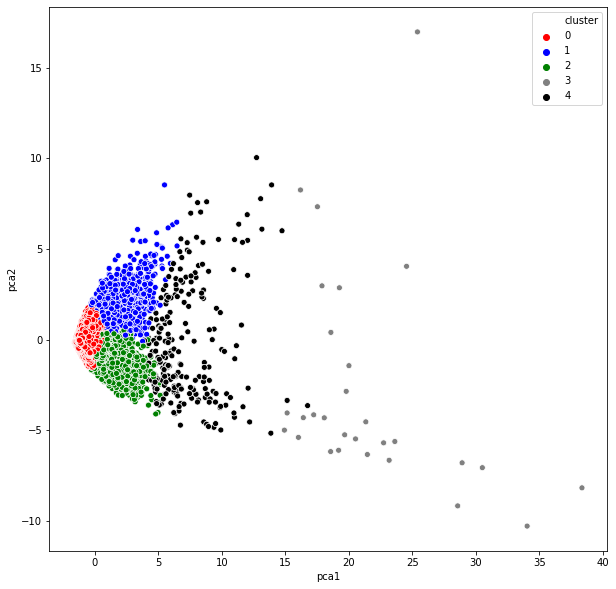

In [61]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=["red","blue","green","grey","black"])